# Augmented Reality using ArUco tags

In [131]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


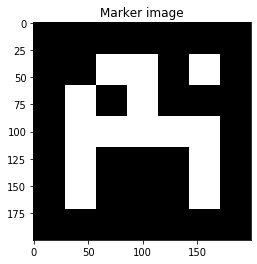

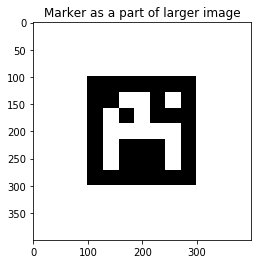

In [132]:
# Load the aruco dictionary
marker_dict = cv2.aruco.Dictionary_get(cv2.aruco.DICT_5X5_50)

#Generate the marker
edgesize = 200
tgtMarkerID = 44
markerImage = np.zeros((edgesize,edgesize),dtype=np.uint8)
marker = cv2.aruco.drawMarker(marker_dict,tgtMarkerID,edgesize,markerImage,1)

plt.imshow(marker,cmap='gray')
plt.title("Marker image")
plt.show()

# Write to file as part of larger image
outImage = 255*np.ones((2*edgesize,2*edgesize),dtype=np.uint8)

outImage[100:300,100:300] = markerImage
plt.imshow(outImage,cmap='gray')
plt.title("Marker as a part of larger image")
plt.show()

ret = cv2.imwrite('images/images_aruco/armarker_1.png',outImage)


## Detect the marker

In [133]:
# Load the dictionary
marker_dict = cv2.aruco.Dictionary_get(cv2.aruco.DICT_5X5_50)

# initialize the detector with default params
params = cv2.aruco.DetectorParameters_create()

params.minDistanceToBorder = 0;
params.adaptiveThreshWinSizeMax = 400;

frame = cv2.imread('images/images_aruco/armarker_1.png')
print("Input image shape is", frame.shape)
# Detect the marker
(corners, ids, rejectedImgPoints) = cv2.aruco.detectMarkers(frame,marker_dict,parameters=params)

detectedMarkerID = ids[0][0]


Input image shape is (400, 400, 3)


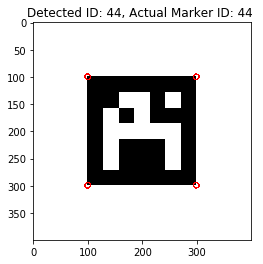

In [134]:
# Show detected conrners

img_corners = np.copy(frame)
# print(img_corners.shape)
for corner in corners:
#     print((pts.shape))

    for i in range(0,4):
        x = corner[0][i][0]
        y = corner[0][i][1]
#         print(x,y)
        img2 = cv2.circle(img_corners, (x, y), 5, (255,0,0), 2)
        

    #Add text to the image
#     img2 = cv2.addText(img2,ids[0][0],(20,20),cv2.FONT_HERSHEY_SIMPLEX,1, (255, 0, 0))
    #img2 = cv2.addText(img2,ids[0][0],(20,20),cv2.FONT_HERSHEY_SIMPLEX,1, (255, 0, 0))

plt.imshow(img2)
plt.title('Detected ID: {}, Actual Marker ID: {} '.format(tgtMarkerID, detectedMarkerID))
plt.show()




In [135]:
# # Show rejected points
# img_rejections = np.copy(frame)
# for pts in rejectedImgPoints:
# #     print((pts.shape))

#     for i in range(0,4):
#         x = pts[0][i][0]
#         y = pts[0][i][1]
# #         print(x,y)
#         img3 = cv2.circle(img_rejections, (x, y), 5, (255,0,0), 2)

# plt.imshow(img3)
# plt.show()
